
# Lab 11: Understanding the data. 

Last 2 classes we have been working on understanding data. In this lab you will apply that.


**Context**
The goal of this lab is to understand a large dataset of 27901 rows and 18 columns Perform Exploratory Data Analysis (EDA) on the data. Look at how the data effects the end result **depression** (yes/no)
## Part 1
- Load and get a basic understanding of the dataset
- Clean up the data 
    - examples:
        - check and fix any missing data 
        - use both Hot and integer encoding
        - convert any numeric data from strings to ints
- Perform Exploratory Data Analysis (EDA) 
    - I will leave it to you to understand and explore this. 
        - Histplot
        - Countplot
        - Correlation
        - Heatmaps
        - boxplots
        - have fun

Make sure to communicate to me along the way. I want your to tell me what your assumptions are what your learning about the data and what you learned with EDA.  There are 18 data points for each student I expect an perform EDA on most of those points like what we did in class with MPG. 

##### ***Remember*** how we did a `sns.pairplot(df[[ "cylinders", "mpg","model_year"]])` and `sns.pairplot(df[["mpg", "horsepower", "weight", "displacement"]])` 


## Part 2: 
Model the data using what we learned in `Linear_Regression_Part2.ipynb` predict if a student will or will not have `Depression` 

- Perform linear Regression on the model using `DecisionTreeRegressor`
- Have at least 5 different models and how dropping a column effects the data predictor 
- Once you find a model with a good prediction play with the size of your test and training data to understand how it affects your model
    - compare the `R²` score  and the `MAE` to show improvement or degradation of the model.

**Remember to have fun with this**

----------------------------------------------------------------------------------------------------------------------------------------------

In [1]:
#part 1 assumed that the CSV file os inn same directory 
import pandas as pd

# Load dataset
df = pd.read_csv("student_depression_dataset.csv")

# Clean 'Sleep Duration' by removing quotes
df['Sleep Duration'] = df['Sleep Duration'].str.replace("'", "").str.strip()

# Convert 'Financial Stress' to numeric
df['Financial Stress'] = pd.to_numeric(df['Financial Stress'], errors='coerce')

# Encode biary columns
df['Suicidal Thoughts'] = df['Have you ever had suicidal thoughts ?'].map({'Yes': 1, 'No': 0})
df['Family History'] = df['Family History of Mental Illness'].map({'Yes': 1, 'No': 0})

# Drop original columns after encoding
df.drop(['Have you ever had suicidal thoughts ?', 'Family History of Mental Illness'], axis=1, inplace=True)

# Onehot encode categorical columns
categorical_cols = ['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Confirm structure of cleaned data
print("\nData types:\n", df.dtypes)
print("\nPreview:\n", df.head())


Missing values:
 id                   0
Age                  0
Academic Pressure    0
Work Pressure        0
CGPA                 0
                    ..
Degree_ME            0
Degree_MHM           0
Degree_MSc           0
Degree_Others        0
Degree_PhD           0
Length: 111, dtype: int64

Data types:
 id                     int64
Age                  float64
Academic Pressure    float64
Work Pressure        float64
CGPA                 float64
                      ...   
Degree_ME              uint8
Degree_MHM             uint8
Degree_MSc             uint8
Degree_Others          uint8
Degree_PhD             uint8
Length: 111, dtype: object

Preview:
    id   Age  Academic Pressure  Work Pressure  CGPA  Study Satisfaction  \
0   2  33.0                5.0            0.0  8.97                 2.0   
1   8  24.0                2.0            0.0  5.90                 5.0   
2  26  31.0                3.0            0.0  7.03                 5.0   
3  30  28.0                3.0   

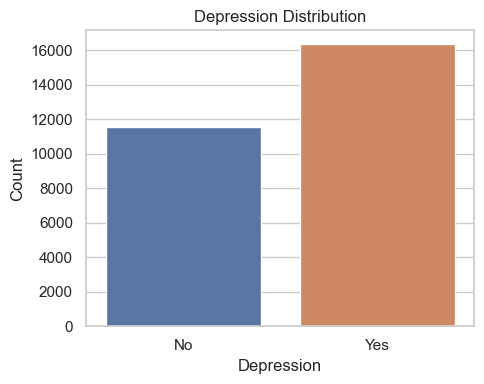

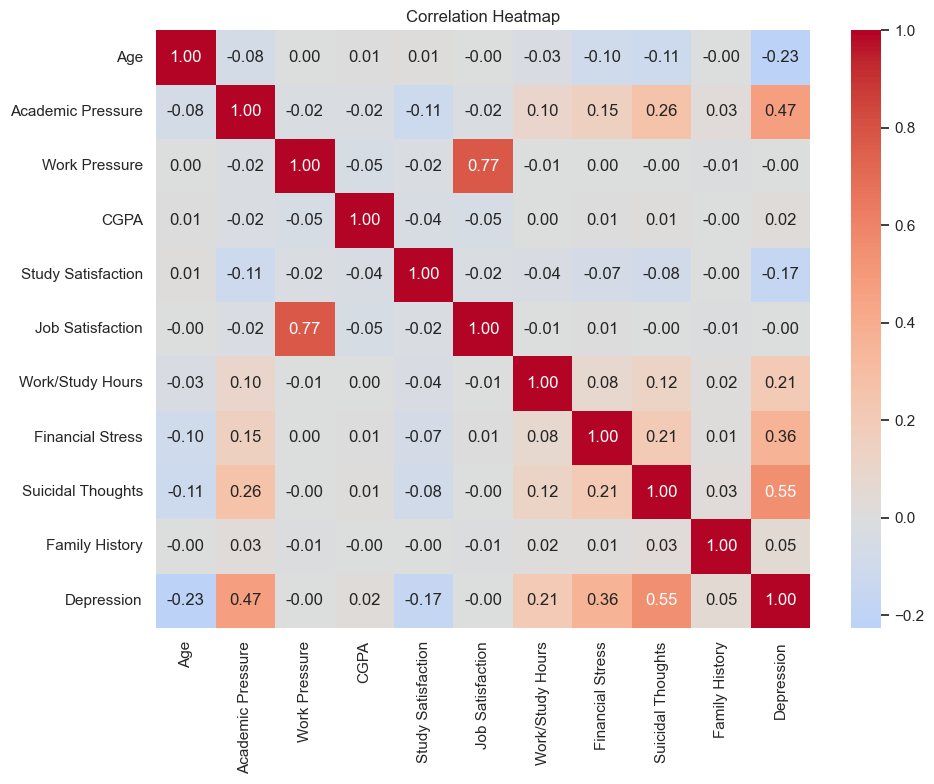

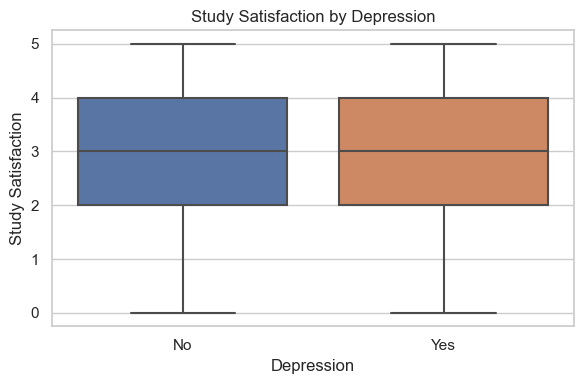

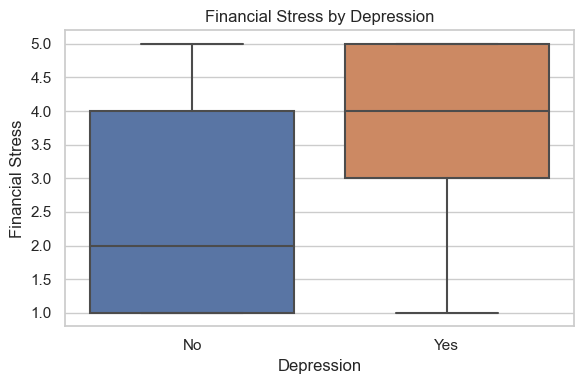

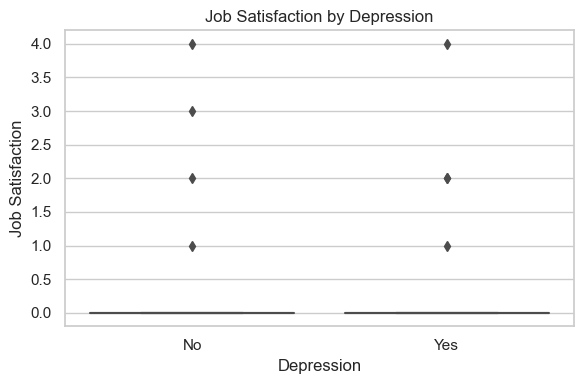

In [ ]:
#part 1 EDA jazz referenced chat to help create the heat maps got to make the 
import seaborn as sns
import matplotlib.pyplot as plt

# Set consistent style
sns.set(style="whitegrid")

# 1. Countplot: Depression class distribution
plt.figure(figsize=(5, 4))
sns.countplot(x='Depression', data=df)
plt.title("Depression Distribution")
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel("Depression")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 2. Correlation heatmap for numeric features
numeric_cols = [
    'Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
    'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
    'Financial Stress', 'Suicidal Thoughts', 'Family History', 'Depression'
]

plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# 3. Boxplot: Study Satisfaction Depression
plt.figure(figsize=(6, 4))
sns.boxplot(x='Depression', y='Study Satisfaction', data=df)
plt.title("Study Satisfaction by Depression")
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.show()

# 4. Boxplot: Financial Stress Depression
plt.figure(figsize=(6, 4))
sns.boxplot(x='Depression', y='Financial Stress', data=df)
plt.title("Financial Stress by Depression")
plt.xticks([0, 1], ['No', 'Yes'])#added frin before
plt.tight_layout()
plt.show()

# 5. Boxplot: Job Satisfaction by Depression
plt.figure(figsize=(6, 4))
sns.boxplot(x='Depression', y='Job Satisfaction', data=df)
plt.title("Job Satisfaction by Depression")
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.show()

# Optional: Pairplot for seleted features
sns.pairplot(df[numeric_cols], hue="Depression", corner=True)
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()
# In this EDA section, we explored how various factors relate to depression
#  found that suicidal thoughts and family mental health history strongly correlate with depression
# Financial stress and low satisfaction with studies or jobs were also associated with higher depression.
# Academic performance (CGPA) and workload appeared less significant but i can tell you this isnt true, 
# These insights suggest that emotional and lifestyle factors have a greater impact than academic metrics, professors have a large contribution personal opi, youve made this year better professor, thank you, 



From: https://www.kaggle.com/datasets/adilshamim8/student-depression-dataset/data


Field Descriptions

**id** - A unique identifier assigned to each student record in the dataset.

**Gender** - The gender of the student (e.g., Male, Female, Other). This helps in analyzing gender-specific trends in mental health.

**Age** - The age of the student in years.

**City** - The city or region where the student resides, providing geographical context for the analysis.

**Profession** - The field of work or study of the student, which may offer insights into occupational or academic stress factors.

**Academic Pressure** - A measure indicating the level of pressure the student faces in academic settings. This could include stress from exams, assignments, and overall academic expectations.

**Work Pressure** - A measure of the pressure related to work or job responsibilities, relevant for students who are employed alongside their studies.

**CGPA** - The cumulative grade point average of the student, reflecting overall academic performance.

**Study Satisfaction** - An indicator of how satisfied the student is with their studies, which can correlate with mental well-being.

**Job Satisfaction** - A measure of the student’s satisfaction with their job or work environment, if applicable.

**Sleep Duration** - The average number of hours the student sleeps per day, which is an important factor in mental health.

**Dietary Habits** - An assessment of the student’s eating patterns and nutritional habits, potentially impacting overall health and mood.

**Degree** - The academic degree or program that the student is pursuing.

**Have you ever had suicidal thoughts ?** - A binary indicator (Yes/No) that reflects whether the student has ever experienced suicidal ideation.

**Work/Study Hours** - The average number of hours per day the student dedicates to work or study, which can influence stress levels.

**Financial Stress** - A measure of the stress experienced due to financial concerns, which may affect mental health.

**Family History of Mental Illness** - Indicates whether there is a family history of mental illness (Yes/No), which can be a significant factor in mental health predispositions.

**Depression** - The target variable that indicates whether the student is experiencing depression (Yes/No).

------------------------------------------------------------------------------------------------------------------------------------------------

*Provided for reference only*
``` python 
import kagglehub
import shutil

# Download latest version
path = kagglehub.dataset_download("adilshamim8/student-depression-dataset")

#move the dowload to the current directory
shutil.move(path, "./Lab_11_dataset")
````

In [3]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# loading the dataset
df = pd.read_csv("./Lab_11_dataset/student_depression_dataset.csv")
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di